In [3]:
# the data 
from keras.datasets import cifar10 
(x_train , y_train),(x_test , y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 4s 0us/step


In [4]:
# the type of the data 
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# the shape 
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape :',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape : (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [8]:
#show an image
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

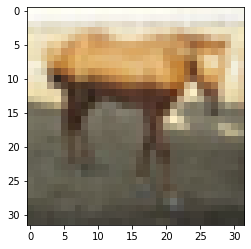

In [18]:
import matplotlib.pyplot as plt
image = plt.imshow(x_train[0])

In [19]:
# the label of the image 
print("the label of the pic is:",y_train[0])
# we don't know what is number 6 means ...so we will use one-hot-encoding method to give every pic a 0 1 value on array so num. 1 will be at index 6 in pic array 
#follow the next block

the label of the pic is: [6]


In [23]:
# حولنا كل صورة على شكل 0و1 عشان بدل ما نضل نطبع الليبل تاعها و نتغلب منروح منستعمل الهوت انكودينغ يعني مكان رقم واحد بكون رقم اللليبل اللي بعبر عن المجموعة تاعت الصورة المصنفة فيها 
from keras.utils import to_categorical
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print(y_train_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [26]:
#  عملنا متغير جديد و حطينا فيه الليبل ب 0 و 1 و هينا عم نطبع الليبل للصورة قبل و بعد 
print("The label of the first pic without hot encoding :",y_train[0])
print("The label of the first pic with hot encoding (one hot label ) :",y_train_hot[0])

The label of the first pic without hot encoding : [6]
The label of the first pic with hot encoding (one hot label ) : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# بدنا نعمل رينج ارقام البكسلز بين الواحد و الصفر 
x_train = x_train /255
x_test = x_test / 255

In [0]:
'''CNN convolutional neural network consists of 4 layers (steps) :
input image>>> convolutional >>> Pooling >>> Fully Connected >>> SoftMax >>> Output Classification 
Reference : Russian Youtube video  '''
from keras.models import Sequential 
from keras.layers import Dense , Flatten , Conv2D , MaxPooling2D 

model = Sequential()

# convolutional layer
# relu stand for : rectifier linear unit
model.add(Conv2D (32,(5,5), activation = 'relu' , input_shape = (32,32,3)))

# MAxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))
#  تكرار الطبقتين اللي فوق مش عارفة ليش بصراح بس بعرف انه مدخلات المرة التانية بكونوا ناتج المرة الاولى 

# convolutional layer
model.add(Conv2D (32,(5,5), activation = 'relu' ))

# MAxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())
model.add(Dense(1000 , activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))


In [0]:
#compile the model 
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [41]:
# Train the model 
hist = model.fit(x_train,y_train_hot,batch_size =256 , epochs=10 , validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 54s 2ms/step - loss: 1.7776 - acc: 0.3517 - val_loss: 1.5450 - val_acc: 0.4382
Epoch 2/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.4554 - acc: 0.4723 - val_loss: 1.4006 - val_acc: 0.4976
Epoch 3/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.2989 - acc: 0.5390 - val_loss: 1.2804 - val_acc: 0.5548
Epoch 4/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.2006 - acc: 0.5751 - val_loss: 1.2233 - val_acc: 0.5741
Epoch 5/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.1148 - acc: 0.6082 - val_loss: 1.1433 - val_acc: 0.6023
Epoch 6/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.0422 - acc: 0.6365 - val_loss: 1.1478 - val_acc: 0.6082
Epoch 7/10
35000/35000 [==============================] - 51s 1ms/step - loss: 0.9843 - acc: 0.6545 - val_loss: 1.0715 - va

In [42]:
model.evaluate(x_test,y_test_hot)[1]

10000/10000 [==============================] - 5s 475us/step


0.6496

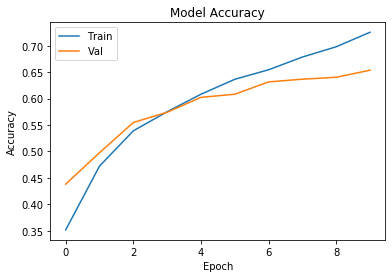

In [44]:
# Visualize the models accuracy 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'upper left')
plt.show()

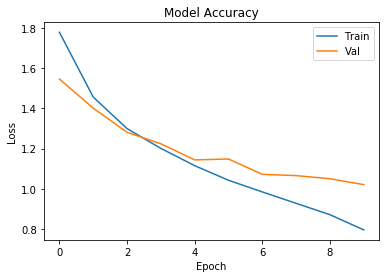

In [46]:
# Visualize the models loss 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'upper right')
plt.show()

In [67]:
from google.colab import files 
uploaded = files.upload()
my_image = plt.imread('cat.4016.jpg')


Saving cat.4016.jpg to cat.4016.jpg


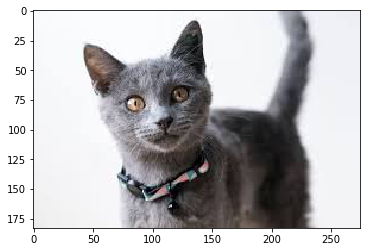

In [68]:
# show the uploaded image 

img = plt.imshow(my_image)

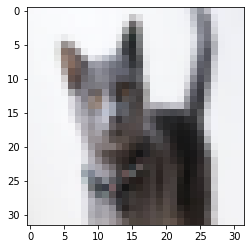

In [69]:
# resize the image 
from skimage.transform import resize
my_image_resized = resize(my_image,(32,32,3))
img = plt.imshow(my_image_resized)

In [70]:
# propability for each class 
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))
print(probabilities)

[[1.0065735e-02 2.4827179e-05 7.9206401e-04 9.3002236e-01 1.1499219e-02
  4.0612176e-02 1.2401372e-05 6.4359568e-03 5.0024048e-04 3.5077708e-05]]


In [71]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.93002236
Second most likely class: dog -- Probability: 0.040612176
Third most likely class: deer -- Probability: 0.011499219
Fourth most likely class: airplane -- Probability: 0.010065735
Fifth most likely class: horse -- Probability: 0.006435957


In [0]:

#To save this model 
model.save('my_model.h5')

#To load this model
from keras.models import load_model
model = load_model('my_model.h5')